In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Users\\Aditi\\Desktop\\IP-Corteva\\Data")

In [2]:
df = pd.read_csv("FarmographicData-West.csv")

In [3]:
df.head()

,TYPE,AIN,BILLINGCITY,BILLINGSTATECODE,BILLINGCOUNTRYCODE,MARKET_DETAIL__C,SIZE__C,UNIT_OF_MEASURE__C
0,End User,CA16EU-0582458,Justice,MB,CA,Canola,280.0,Acres
1,End User,CA16EU-0582458,Justice,MB,CA,Wheat (Spring),500.0,Acres
2,End User,CA16EU-0582458,Justice,MB,CA,Total Seeded Acres,780.0,Acres
3,End User,CA16EU-0582459,Red Deer,AB,CA,Total Seeded Acres,750.0,Acres
4,End User,CA16EU-0582459,Red Deer,AB,CA,Canola,300.0,Acres


Check for duplicates

In [4]:
x=df.duplicated(['AIN','MARKET_DETAIL__C'])


In [5]:
s = pd.Series(x)
s = s[s == True]


In [6]:
duplicate_index=[]
for i in range(0,len(s)):
    duplicate_index.append(s.index[i])
duplicate_index

[637,
 1369,
 3199,
 3267,
 3268,
 8221,
 8223,
 8621,
 11192,
 11201,
 11203,
 11286,
 11368,
 11378,
 11560,
 11616,
 11629,
 11722,
 11759,
 11837,
 11856,
 11898,
 11935,
 12077,
 12095,
 12105,
 12108,
 12114,
 12184,
 12192,
 12356,
 12394,
 12468,
 12526,
 12536,
 12572,
 12579,
 12590,
 12615,
 12616,
 12617,
 12618,
 12619,
 12621,
 12692,
 12750,
 12757,
 12772,
 12877,
 12932,
 12967,
 12974,
 13008,
 13009,
 13062,
 13064,
 13067,
 13087,
 13128,
 13130,
 13155,
 13159,
 13163,
 13168,
 13205,
 13310,
 13485,
 13495,
 13499,
 13500,
 13551,
 13569,
 13609,
 13691,
 13704,
 13760,
 13763,
 13836,
 13837,
 13856,
 13943,
 13954,
 14040,
 14086,
 14173,
 14193,
 14201,
 14225,
 14249,
 14266,
 14267,
 14296,
 14330,
 14436,
 14566,
 14698,
 14750,
 14754,
 14764,
 14799,
 14800,
 14810,
 14924,
 14969,
 14981,
 15055,
 19861,
 19864,
 25946,
 35597,
 36132,
 36133,
 36134,
 37560,
 38851,
 38854,
 41239,
 41240,
 41241,
 41981,
 42038,
 42039,
 43072,
 44171,
 44172,
 44173,
 

In [7]:
df_duplicates=df.iloc[duplicate_index]

In [8]:
df_duplicates=df_duplicates.drop_duplicates()

Separtate by unit of measure and roll up

In [9]:
df_Acres= df.loc[(df['UNIT_OF_MEASURE__C'] =='Acres')]

In [10]:
df_Acres=df_Acres.groupby(['TYPE', 'AIN', 'BILLINGCITY', 'BILLINGSTATECODE','BILLINGCOUNTRYCODE', 'MARKET_DETAIL__C',  'UNIT_OF_MEASURE__C'])['SIZE__C'].sum().reset_index(name='SIZE__C')

In [11]:
df_notAcres= df.loc[(df['UNIT_OF_MEASURE__C'] !='Acres')]

In [12]:
df = pd.concat([df_Acres,df_notAcres])
df.columns.values

C:\Users\Aditi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


array(['AIN', 'BILLINGCITY', 'BILLINGCOUNTRYCODE', 'BILLINGSTATECODE',
       'MARKET_DETAIL__C', 'SIZE__C', 'TYPE', 'UNIT_OF_MEASURE__C'],
      dtype=object)

In [13]:
df_pivot=df.pivot(index='AIN', columns='MARKET_DETAIL__C', values=['SIZE__C'])

In [14]:
df_pivot.reset_index(inplace=True)
df_pivot.columns = [f'{j}' for i, j in df_pivot.columns]

In [15]:
df_pivot.rename(columns={'':'AIN'}, 
                 inplace=True)


In [16]:
#df_subset=df[['AIN', 'BILLINGSTATECODE']]#.drop_duplicates()

In [17]:
#df_subset=df_subset.drop_duplicates()

In [18]:
#df_merged=df_pivot.merge(df_subset, left_on='AIN', right_on='AIN', how='inner')

Use this DF for unsupervised cluster by different types of farms owned by the customer

In [19]:
#df_for_cluster=df_merged
df_for_cluster=df_pivot

In [20]:
df_for_cluster=df_for_cluster.drop(columns=['AIN'])

In [21]:
df_for_cluster.columns.values

array(['Alfalfa', 'Apples', 'Barley', 'Beans, Edible', 'Beef',
       'Blueberries', 'Canary Seed', 'Canola', 'Cherries', 'Chickpeas',
       'Corn, Grain', 'Corn, Silage', 'Cow/Calf', 'Cranberries', 'Dairy',
       'Fababeans', 'Flax', 'Forage', 'Fruits, General', 'Grapes',
       'Lentils', 'Mustard', 'Oats', 'Onions', 'Peas',
       'Permanent Pasture', 'Potato, Processing', 'Potato, Seed/Table',
       'Potatoes', 'Rye', 'Soybeans', 'Soybeans, RR', 'Strawberries',
       'Summerfallow', 'Sunflowers', 'Timothy', 'Tobacco',
       'Total Seeded Acres', 'Vegetables, General', 'Walnuts',
       'Wheat (Spring)', 'Wheat (Winter)', 'Wheat, Durum'], dtype=object)

In [22]:
#df_for_cluster = pd.get_dummies(df_for_cluster,columns=['BILLINGSTATECODE'],  drop_first=True)

In [23]:
df_for_cluster['cluster']=0

In [24]:
df_for_cluster=df_for_cluster.fillna(0)

Sum columns 'Cow/Calf','Beef' and 'Dairy', since all are same

In [25]:
df_for_cluster['Cattle']=df_for_cluster[['Cow/Calf','Beef','Dairy']].sum(axis=1)

In [26]:
df_for_cluster=df_for_cluster.drop(columns=['Cow/Calf','Beef','Dairy'])

Calculate Actual Seeded Acres

In [27]:
df_for_cluster['Actual Total Seeded Area']= df_for_cluster[['Alfalfa', 'Apples', 'Barley', 'Beans, Edible', 'Blueberries','Canary Seed', 'Canola', 'Cherries', 'Chickpeas', 'Corn, Grain', 'Corn, Silage', 'Cranberries', 'Fababeans', 'Flax', 'Forage','Fruits, General', 'Grapes', 'Lentils', 'Mustard', 'Oats', 'Onions', 'Peas', 'Potato, Processing','Potato, Seed/Table', 'Potatoes', 'Rye', 'Soybeans', 'Soybeans, RR', 'Strawberries', 'Summerfallow', 'Sunflowers','Timothy', 'Tobacco', 'Vegetables, General','Walnuts', 'Wheat (Spring)', 'Wheat (Winter)', 'Wheat, Durum']].sum(axis=1)

In [32]:
df_standarize=df_for_cluster

Standardize the data before clustering

In [34]:
import math
for col in df_standarize.columns.values:
    mean=df_standarize[col].mean()
    stdev=df_standarize[col].std()
    #print(col,mean,stdev)
    df_standarize[col]=(df_standarize[col]-mean)/stdev
    if math.isnan(stdev):
        print(col)
        df_standarize=df_standarize.drop(columns=col)



cluster


In [36]:
#Remove Total Seeded Acres and keep the column calculated by actual area document for each type of farm
df_standarize=df_standarize.drop(columns=['Total Seeded Acres'])

Try find 

In [37]:
from sklearn.cluster import KMeans

#Determining number of clusters
nClusters=range(2,10)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(df_standarize)
    sumDistances.append(kmeans.inertia_) #Proxy for SSE

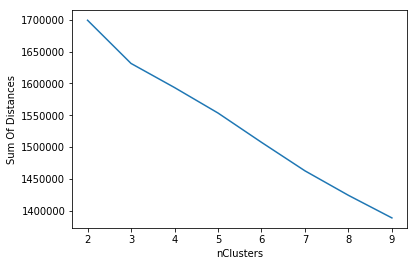

In [38]:
#Plotting the Elbow Plot 
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.show()

Silhouette Analysis to find ideal number of clusters

In [39]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


In [40]:
X=df_standarize

MemoryError: 

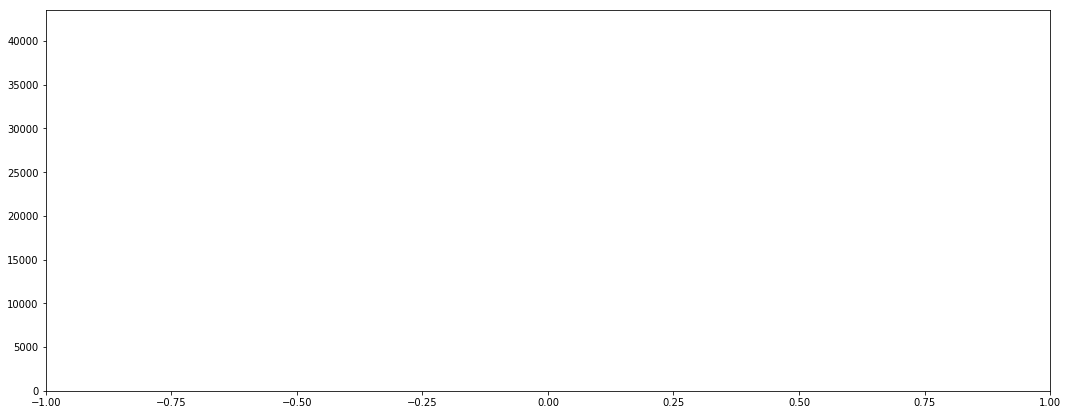

In [41]:
for n_clusters in nClusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

In [34]:
kmeans=KMeans(n_clusters=3).fit(df_for_cluster)

df_for_cluster['cluster']=kmeans.labels_
#g = sns.pairplot(data,hue='Cluster')

In [36]:
df_for_cluster.to_excel("output1.xlsx", sheet_name='Sheet_name_1')  